# 16. Concentration Inequalities

**Goal:** Compare tail bounds against empirical tail probabilities.

For $S_n = \sum_{i=1}^n X_i$ with i.i.d. bounded random variables:

| Bound | Tightness | Uses |
|-------|-----------|------|
| **Markov** | Loosest | Only mean |
| **Chebyshev** | Moderate | Mean + variance |
| **Chernoff** | Tight | MGF |
| **Hoeffding** | Tight | Bounded support |

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

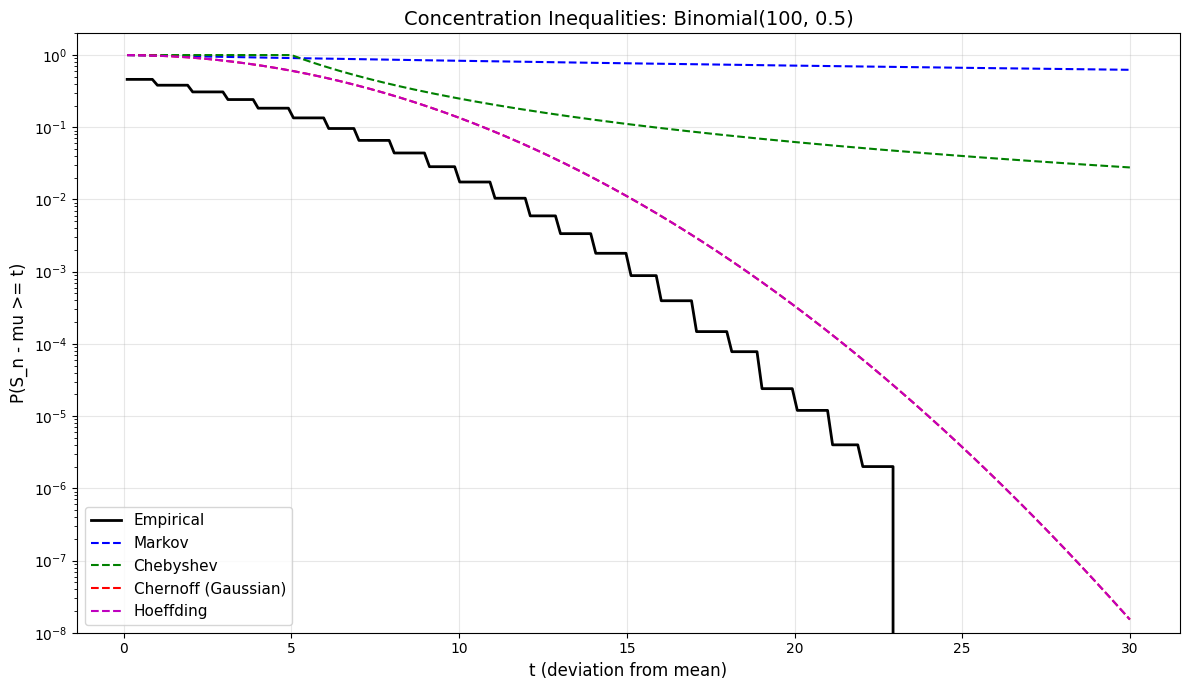

In [2]:
np.random.seed(42)
n = 100
N_sim = 500000

# X_i ~ Bernoulli(0.5), so S_n ~ Binomial(n, 0.5)
mu = n * 0.5
var = n * 0.25
sigma = np.sqrt(var)

samples = np.random.binomial(n, 0.5, N_sim)

ts = np.linspace(0.1, 30, 200)  # deviation from mean

# Empirical tail P(S_n - mu >= t)
empirical = np.array([np.mean(samples - mu >= t) for t in ts])

# Markov: P(S_n >= mu + t) <= E[S_n]/(mu + t)
markov = mu / (mu + ts)
markov = np.minimum(markov, 1)

# Chebyshev: P(|S_n - mu| >= t) <= var/t^2
chebyshev = var / ts**2
chebyshev = np.minimum(chebyshev, 1)

# Hoeffding: P(S_n - mu >= t) <= exp(-2t^2/n)  [since X_i in [0,1]]
hoeffding = np.exp(-2 * ts**2 / n)

# Chernoff (Bernoulli): P(S_n >= mu + t) <= exp(-2t^2/n)
# (Same as Hoeffding for bounded [0,1] variables)
chernoff = np.exp(-ts**2 / (2 * var))  # Gaussian-type bound

fig, ax = plt.subplots(figsize=(12, 7))
ax.semilogy(ts, empirical, 'k-', linewidth=2, label='Empirical')
ax.semilogy(ts, markov, 'b--', linewidth=1.5, label='Markov')
ax.semilogy(ts, chebyshev, 'g--', linewidth=1.5, label='Chebyshev')
ax.semilogy(ts, chernoff, 'r--', linewidth=1.5, label='Chernoff (Gaussian)')
ax.semilogy(ts, hoeffding, 'm--', linewidth=1.5, label='Hoeffding')
ax.set_xlabel('t (deviation from mean)', fontsize=12)
ax.set_ylabel('P(S_n - mu >= t)', fontsize=12)
ax.set_title(f'Concentration Inequalities: Binomial({n}, 0.5)', fontsize=14)
ax.legend(fontsize=11)
ax.set_ylim(1e-8, 2)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Tightness Comparison Across n

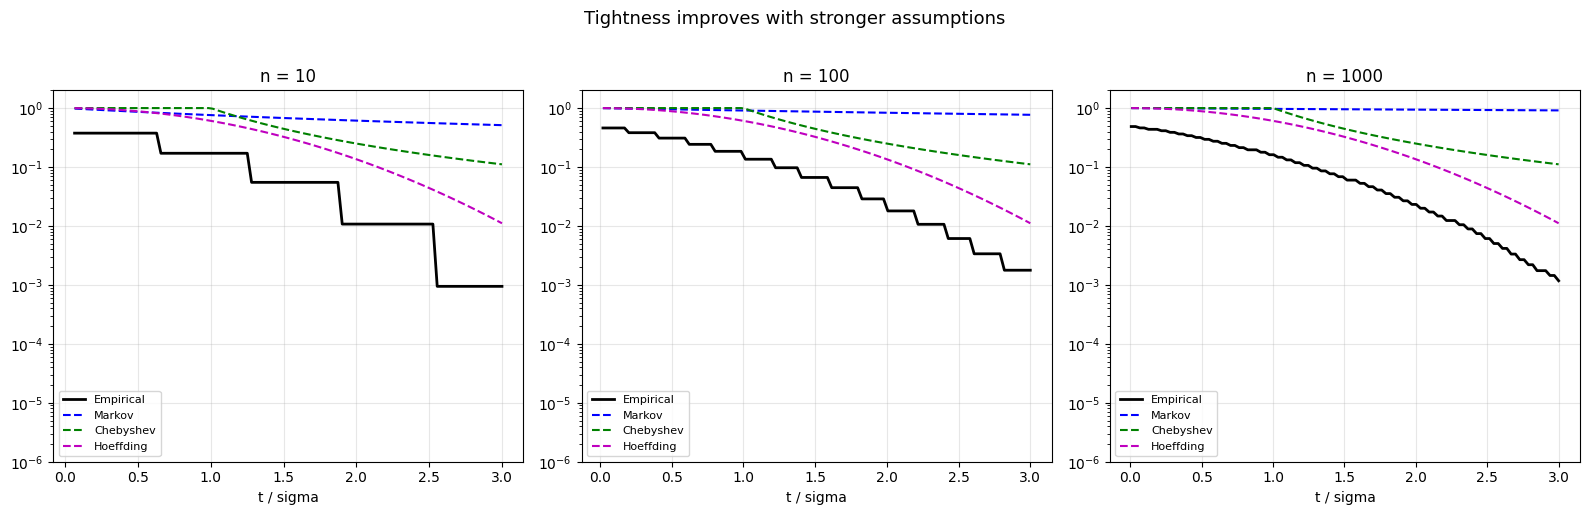

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
for ax, n in zip(axes, [10, 100, 1000]):
    mu = n * 0.5
    var = n * 0.25
    ts = np.linspace(0.1, 3*np.sqrt(var), 100)
    
    samps = np.random.binomial(n, 0.5, 200000)
    emp = [np.mean(samps - mu >= t) for t in ts]
    
    ax.semilogy(ts/np.sqrt(var), emp, 'k-', linewidth=2, label='Empirical')
    ax.semilogy(ts/np.sqrt(var), np.minimum(mu/(mu+ts), 1), 'b--', label='Markov')
    ax.semilogy(ts/np.sqrt(var), np.minimum(var/ts**2, 1), 'g--', label='Chebyshev')
    ax.semilogy(ts/np.sqrt(var), np.exp(-2*ts**2/n), 'm--', label='Hoeffding')
    ax.set_xlabel('t / sigma'); ax.set_title(f'n = {n}', fontsize=12)
    ax.set_ylim(1e-6, 2); ax.legend(fontsize=8); ax.grid(True, alpha=0.3)
plt.suptitle('Tightness improves with stronger assumptions', fontsize=13, y=1.02)
plt.tight_layout()
plt.show()

## Key Takeaways

1. **Hierarchy:** Markov (loosest) < Chebyshev < Chernoff/Hoeffding (tightest).
2. **More information = tighter bounds:** Markov uses only the mean; Hoeffding uses boundedness.
3. **Exponential bounds** (Chernoff, Hoeffding) decay much faster than polynomial bounds (Markov, Chebyshev).
4. These are fundamental tools in probability, statistics, and theoretical CS (PAC learning, randomized algorithms).